In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import scikitplot as skplt
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 350)

In [3]:
data=pd.read_csv("https://drive.google.com/uc?export=download&id=1LU5be_H1TD2Pp1OmI202to3YyKo9AzFY")
df = pd.DataFrame(data)

In [4]:
total_before_preprocesing = len(df)

# EDA

In [5]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [6]:
df.isna().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [7]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


<AxesSubplot:>

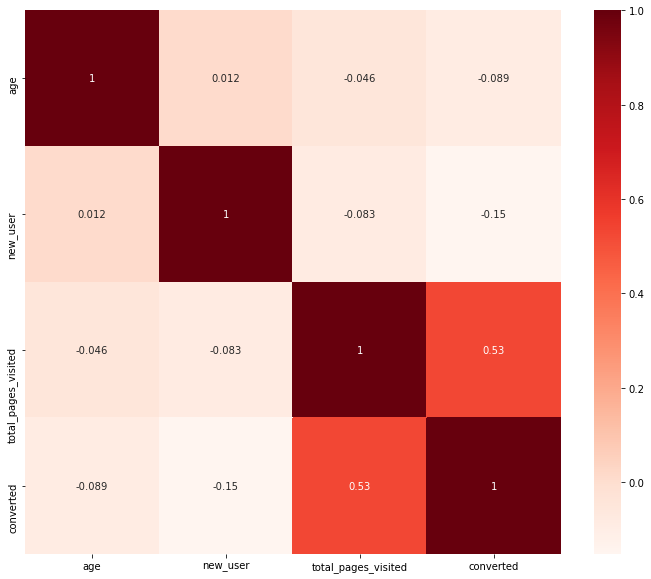

In [8]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

<AxesSubplot:>

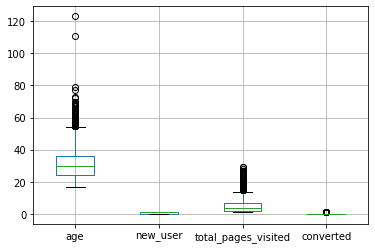

In [9]:
df.boxplot()

Text(0, 0.5, 'conversion rate')

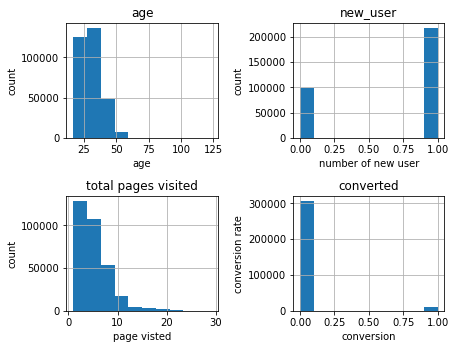

In [10]:
fig,axs = plt.subplots(2,2)
plt.subplots_adjust(right =1, bottom = 1, top = 2, wspace = 0.5, hspace = 0.5)


plt.sca(axs[0,0])
df['age'].hist()

plt.sca(axs[0,1])
df['new_user'].hist()

plt.sca(axs[1,0])
df['total_pages_visited'].hist()

plt.sca(axs[1,1])
df['converted'].hist()


axs[0,0].title.set_text('age')
axs[0,0].set_xlabel('age')
axs[0,0].set_ylabel('count')


axs[0,1].title.set_text('new_user')
axs[0,1].set_xlabel('number of new user')
axs[0,1].set_ylabel('count')


axs[1,0].title.set_text('total pages visited')
axs[1,0].set_xlabel('page visted')
axs[1,0].set_ylabel('count')

axs[1,1].title.set_text('converted')
axs[1,1].set_xlabel('conversion')
axs[1,1].set_ylabel('conversion rate')

Text(0, 0.5, 'Count')

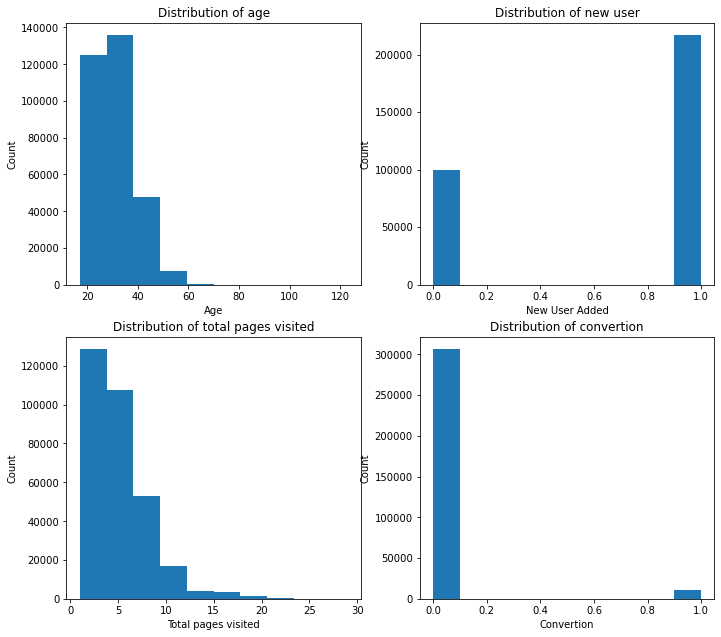

<Figure size 1080x1080 with 0 Axes>

In [11]:
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(left = 1, right = 2.5, top = 4, bottom = 2)
plt.figure(figsize=(15,15))
axs[0,0].hist(df['age'])
axs[0,1].hist(df['new_user'])
axs[1,0].hist(df['total_pages_visited'])
axs[1,1].hist(df['converted'])


axs[0,0].title.set_text('Distribution of age')
axs[0,0].set_xlabel('Age')
axs[0,0].set_ylabel('Count')

axs[0,1].title.set_text('Distribution of new user')
axs[0,1].set_xlabel('New User Added')
axs[0,1].set_ylabel('Count')

axs[1,0].title.set_text('Distribution of total pages visited')
axs[1,0].set_xlabel('Total pages visited')
axs[1,0].set_ylabel('Count')

axs[1,1].title.set_text('Distribution of convertion')
axs[1,1].set_xlabel('Convertion')
axs[1,1].set_ylabel('Count')

Text(0.5, 1.0, '#people in each country')

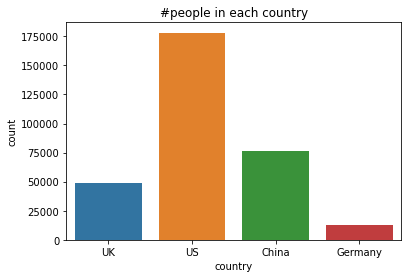

In [12]:
sns.countplot(x = 'country',data = df)
plt.title('#people in each country')

<AxesSubplot:xlabel='age', ylabel='count'>

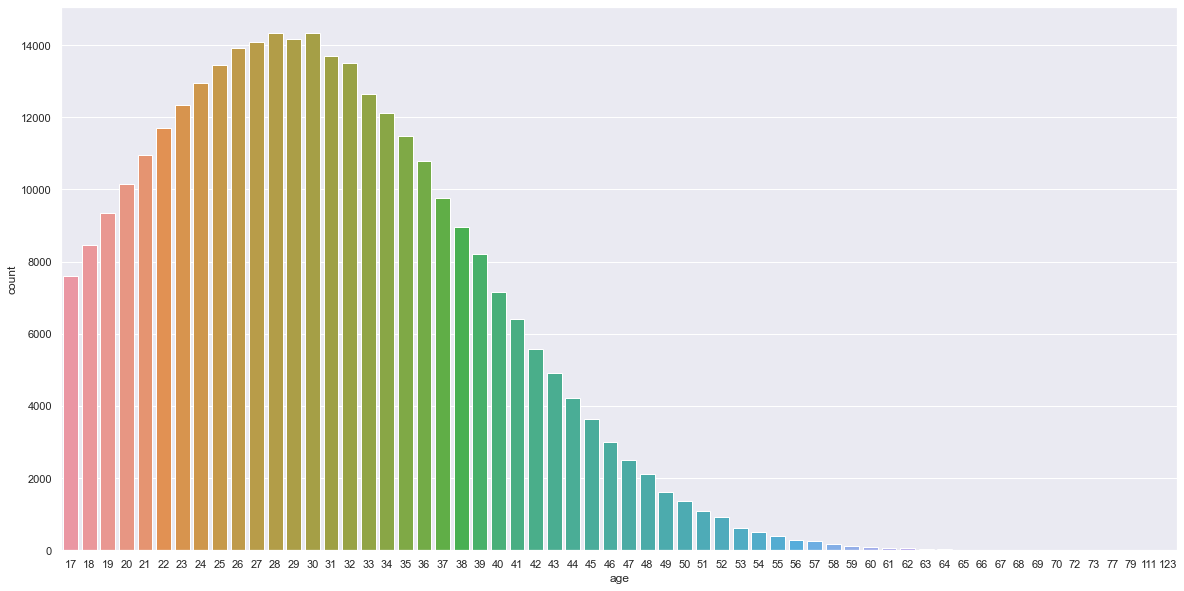

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'age', data = df)

<AxesSubplot:xlabel='source', ylabel='count'>

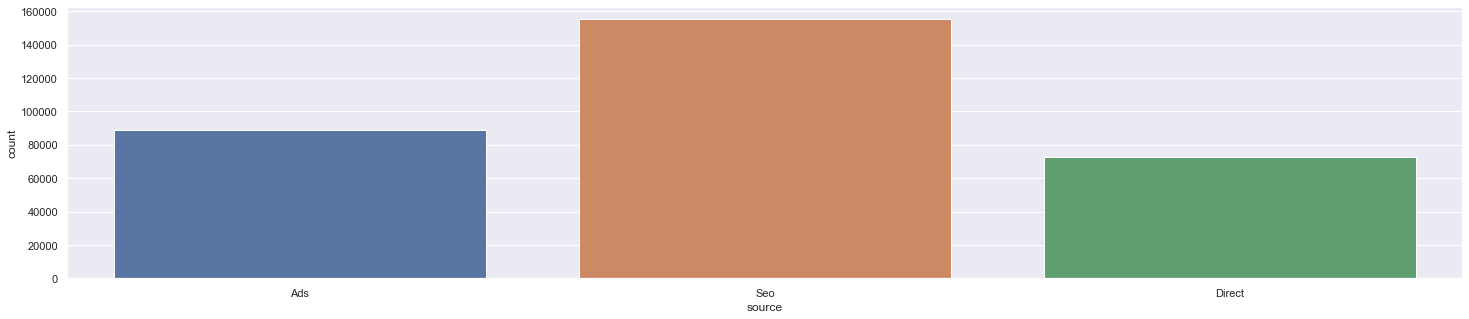

In [14]:
sns.countplot(x = 'source',data = df)

<AxesSubplot:xlabel='total_pages_visited', ylabel='count'>

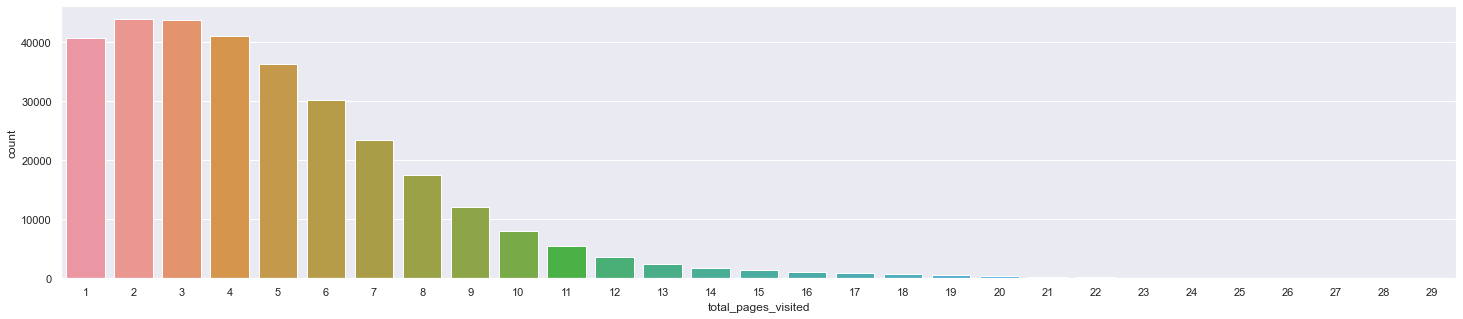

In [15]:
sns.countplot(x = 'total_pages_visited',data = df)

Text(0.5, 1.0, 'NON-Converted')

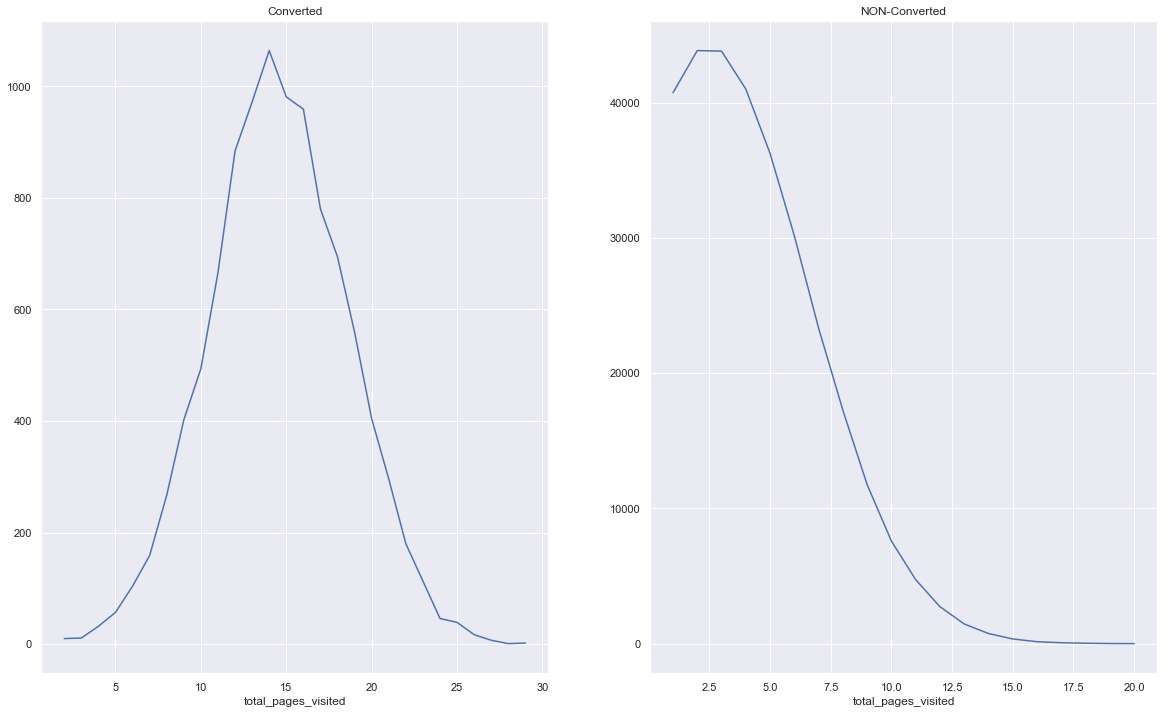

In [99]:
#relationship between conversion and total_pages_visited since they have greatest relation in the heatmap
convert_page_group = df.groupby(['converted','total_pages_visited']).size()
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
convert_page_group[1].plot()
plt.title('Converted')

plt.subplot(1,2,2)
convert_page_group[0].plot()
plt.title('NON-Converted')

Text(0.5, 1.0, 'NON-Converted')

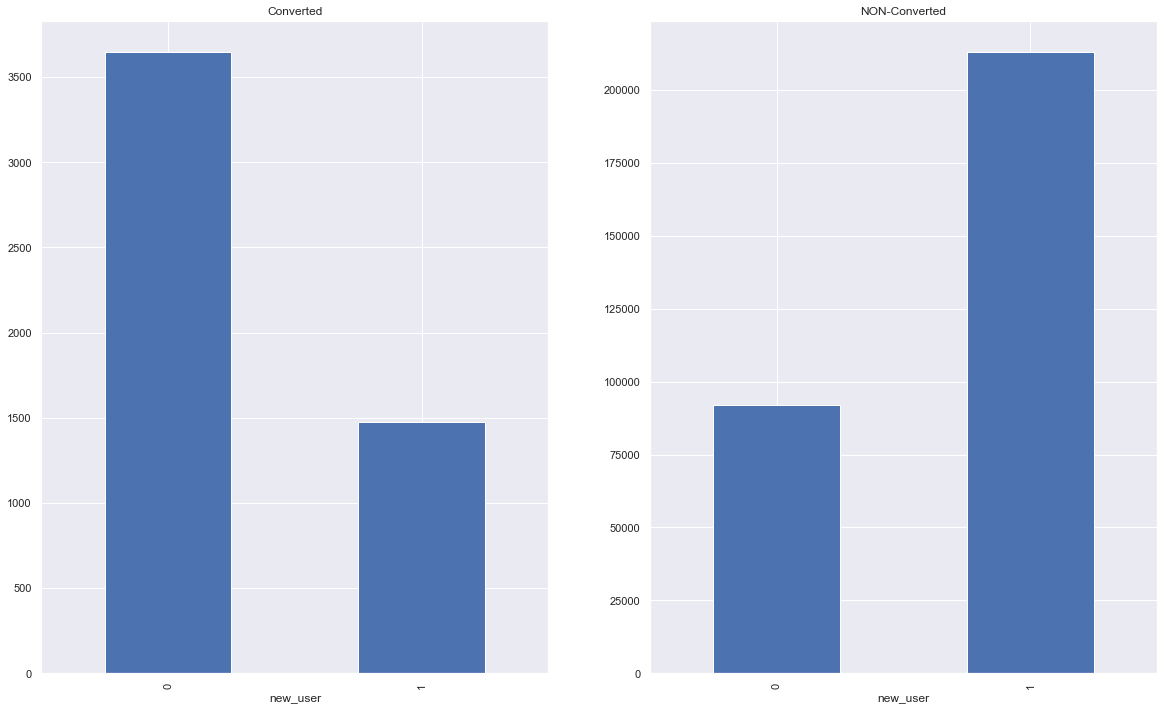

In [110]:
#relationship between conversion and if the customer is a new user or not
#since they have greatest relation in the heatmap
convert_page_group = df.groupby(['converted','new_user']).size()
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
convert_page_group[1].plot(kind = 'bar')
plt.title('Converted')

plt.subplot(1,2,2)
convert_page_group[0].plot(kind = 'bar')
plt.title('NON-Converted')

Text(0.5, 1.0, 'NON-Converted')

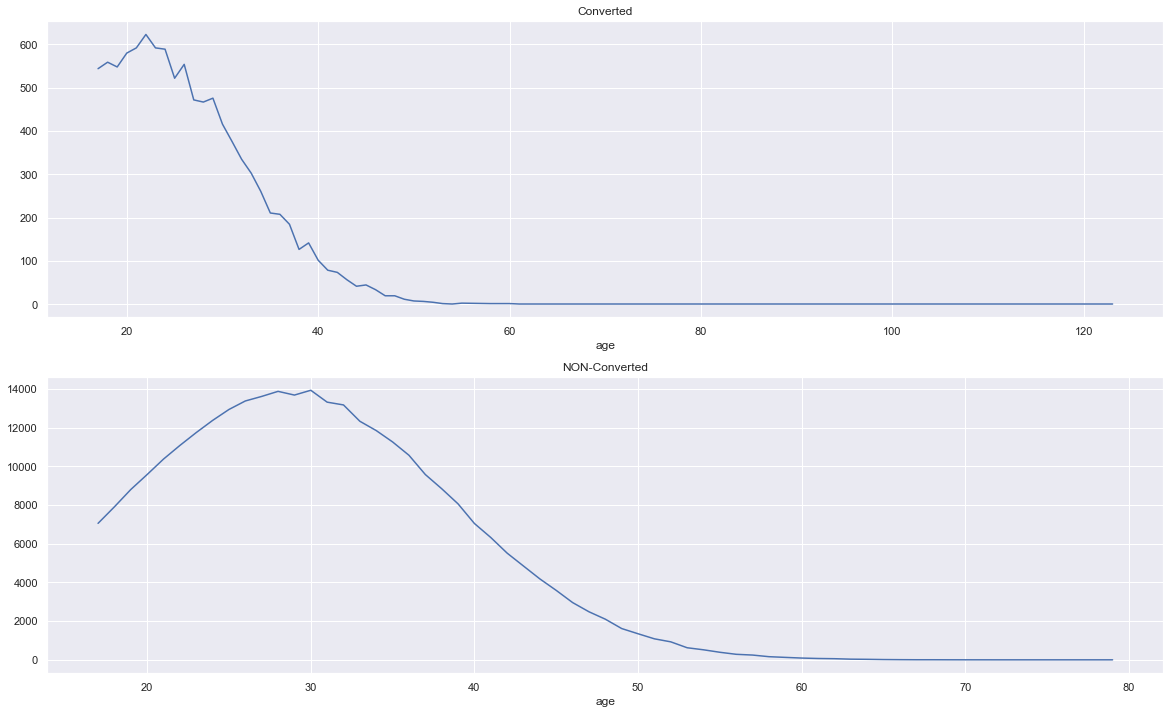

In [100]:
convert_page_group = df.groupby(['converted','age']).size()
plt.figure(figsize=(20,12))
plt.subplot(2,1,1)
convert_page_group[1].plot()
plt.title('Converted')

plt.subplot(2,1,2)
convert_page_group[0].plot()
plt.title('NON-Converted')

Text(0.5, 1.0, 'Germany')

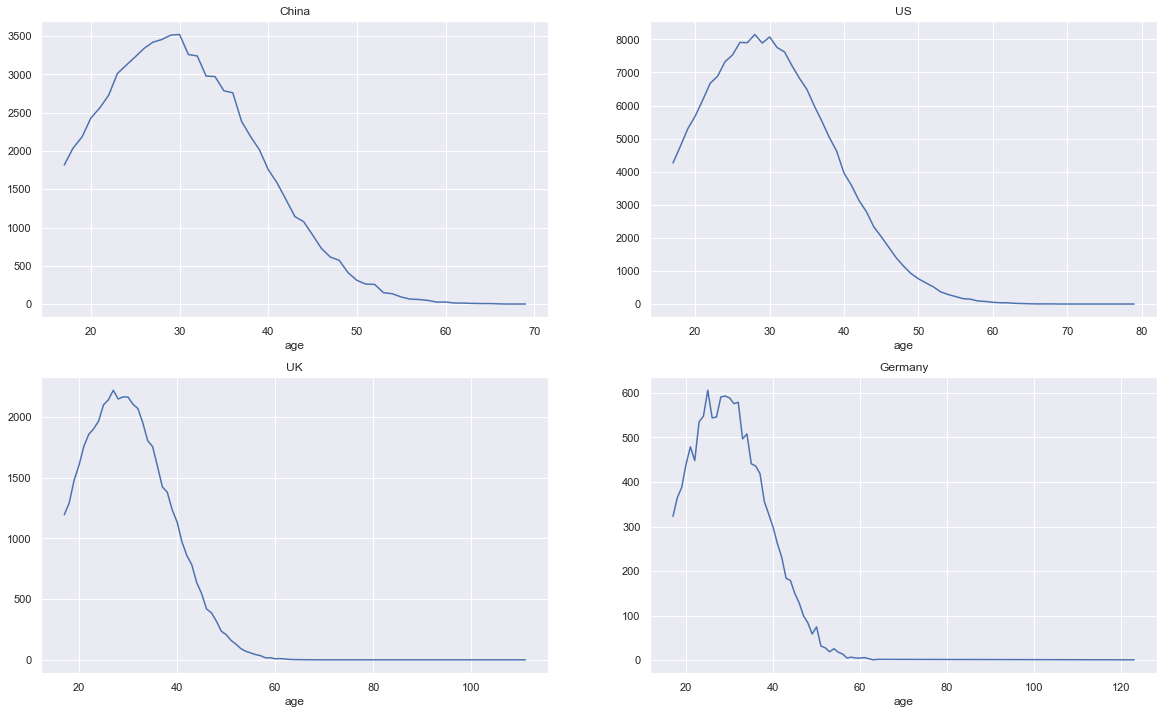

In [39]:
#relationship between country and age
country_age_group = df.groupby(['country','age']).size()
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
#plt.tight_layout()
country_age_group['China'].plot()
plt.title('China')

plt.subplot(2,2,2)
country_age_group['US'].plot()
plt.title('US')

plt.subplot(2,2,3)
country_age_group['UK'].plot()
plt.title('UK')

plt.subplot(2,2,4)
country_age_group['Germany'].plot()
plt.title('Germany')

<AxesSubplot:xlabel='source,source'>

<Figure size 1440x3600 with 0 Axes>

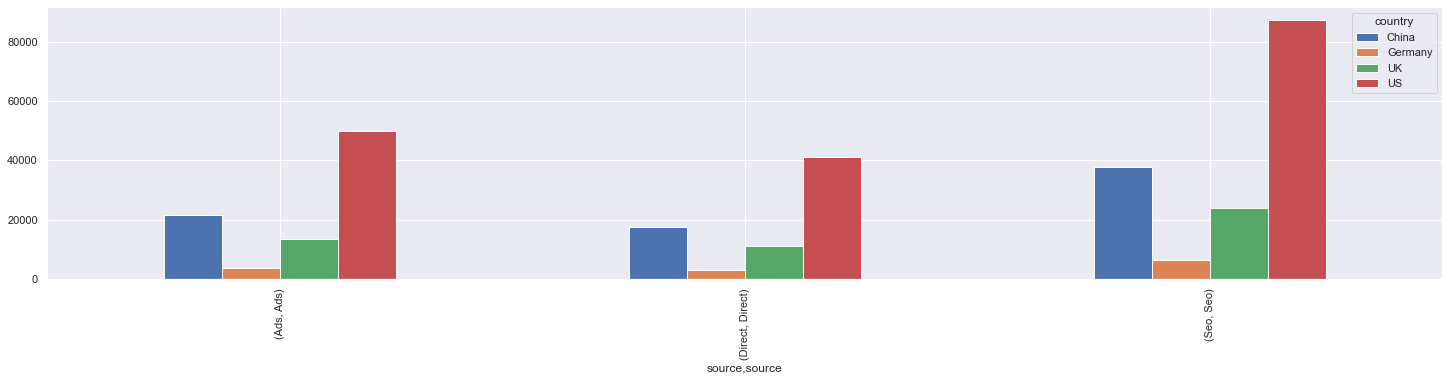

In [101]:
#relationship between country and source
plt.figure(figsize=(20,50))
df.groupby(['country','source']).source.value_counts().unstack(0).plot.bar()

Text(0.5, 1.0, 'Direct')

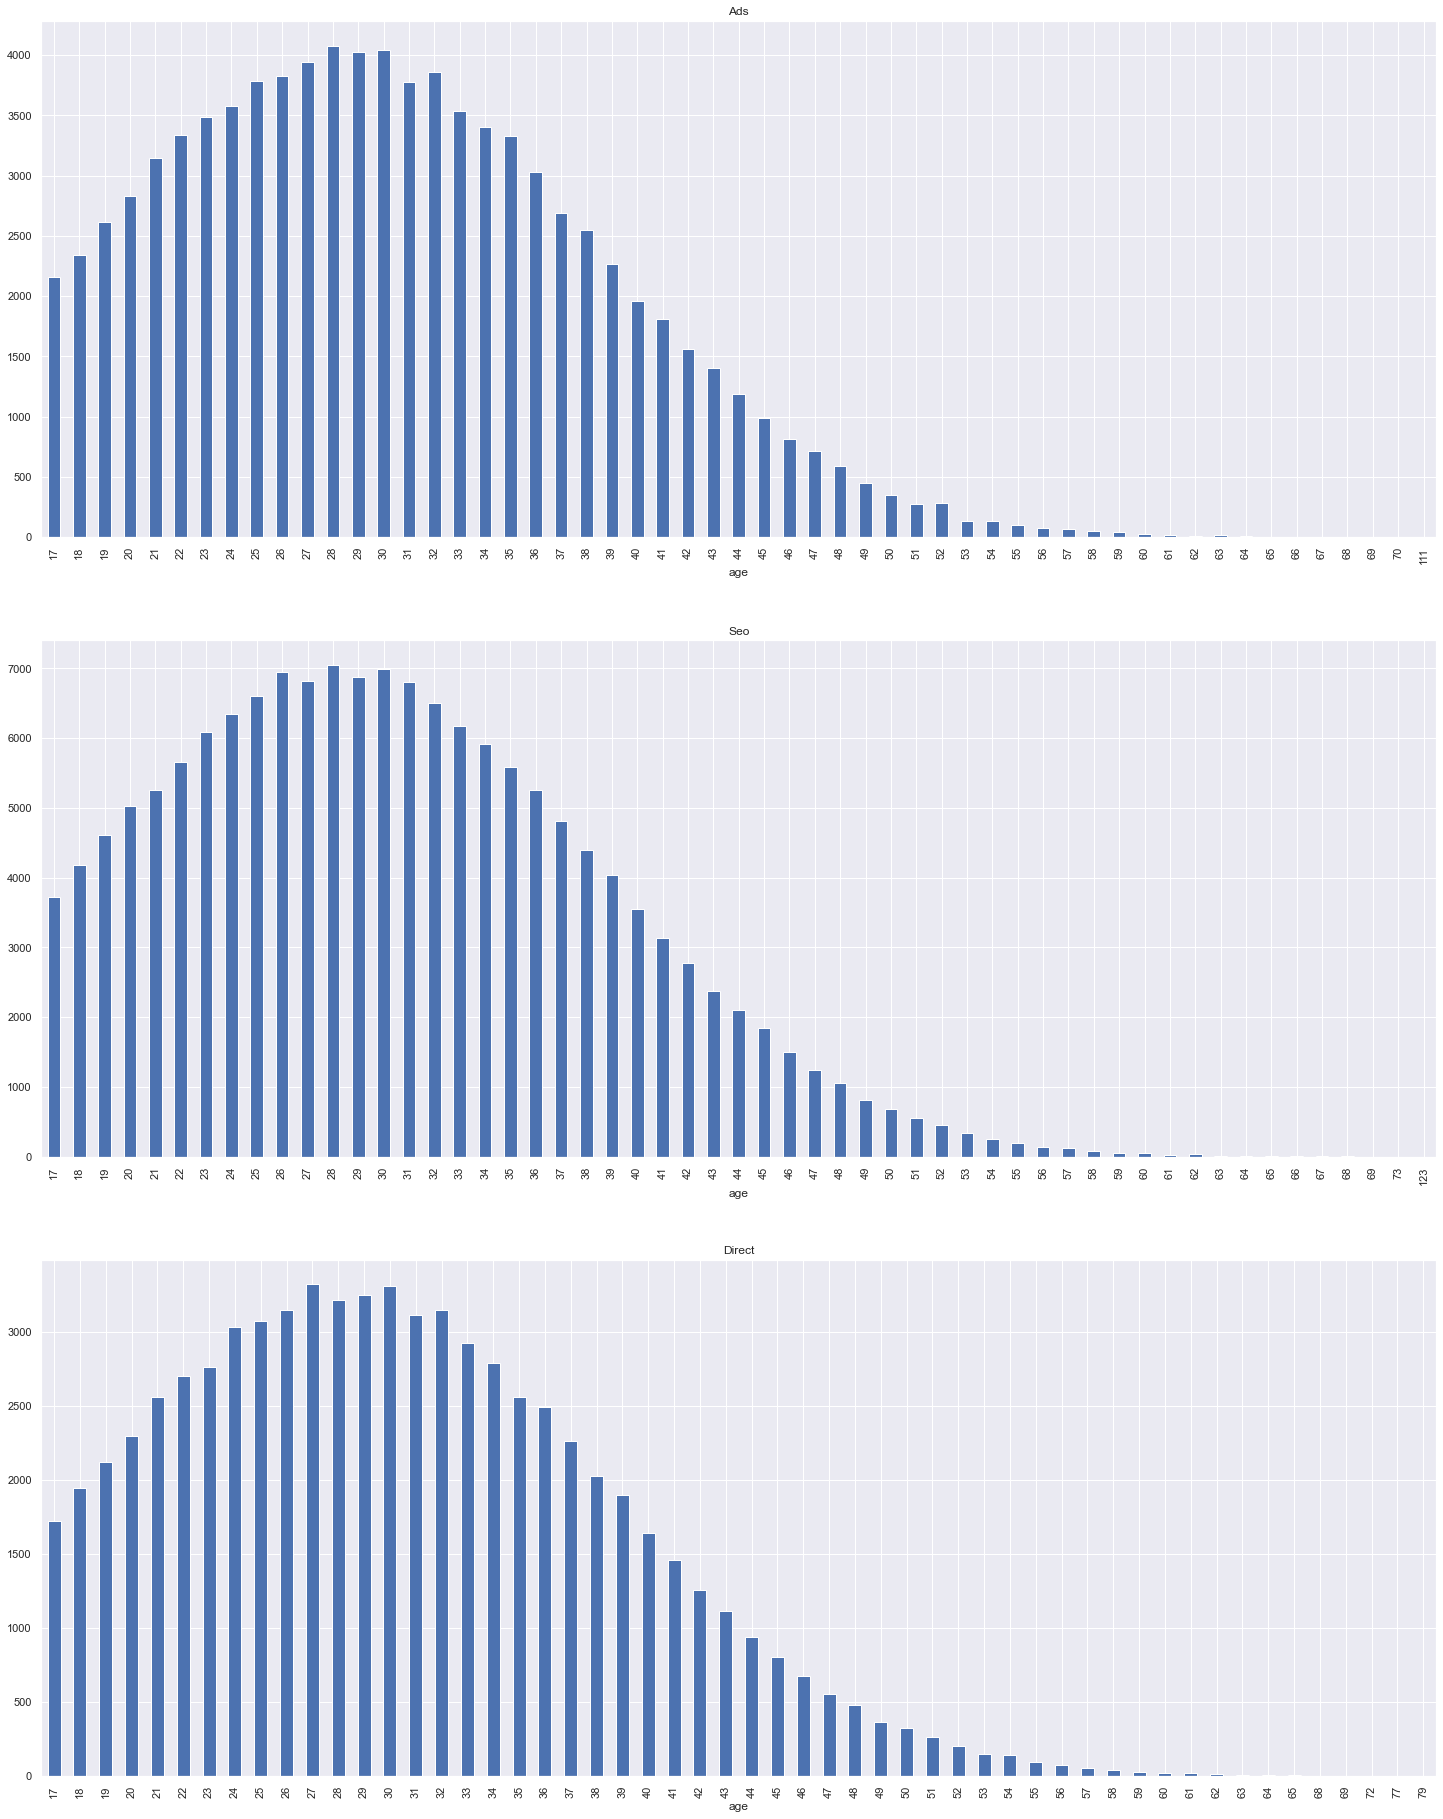

In [88]:
plt.subplot(3,1,1)
plt.subplots_adjust(top = 5)
source_age_group = df.groupby(['source','age']).size()
source_age_group['Ads'].plot(kind = 'bar')
plt.title('Ads')

plt.subplot(3,1,2)
source_age_group = df.groupby(['source','age']).size()
source_age_group['Seo'].plot(kind = 'bar')
plt.title('Seo')

plt.subplot(3,1,3)
source_age_group = df.groupby(['source','age']).size()
source_age_group['Direct'].plot(kind = 'bar')
plt.title('Direct')

# Data Pre-processing

                 age       new_user  total_pages_visited      converted
count  310301.000000  310301.000000        310301.000000  310301.000000
mean       30.609257       0.691541             4.642325       0.016500
std         8.227654       0.461858             2.879708       0.127389
min        17.000000       0.000000             1.000000       0.000000
25%        24.000000       0.000000             2.000000       0.000000
50%        30.000000       1.000000             4.000000       0.000000
75%        36.000000       1.000000             6.000000       0.000000
max        60.000000       1.000000            14.000000       1.000000
Number of rows removed:  5899


<AxesSubplot:>

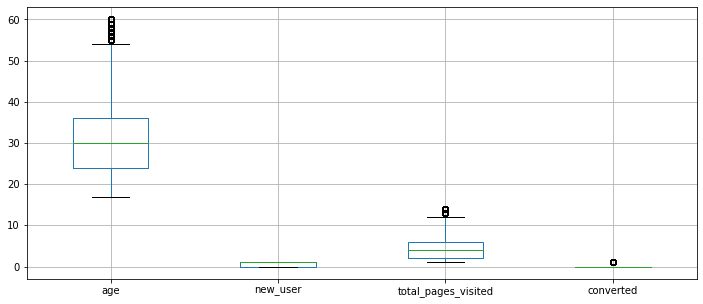

In [6]:
#From the boxplot above, we can observe that there are some outliers in the age feature, and we need to remove them.
#Using IQR method and we can start by defining a function

def IQR_method(df,feature):
    Q3, Q1 = np.percentile(df[feature], [80 ,20])
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    df=df[~((df[feature]<lower) | (df[feature]>upper))]
    return df

df = IQR_method(df,'age')
df = IQR_method(df, 'total_pages_visited')
print(df.describe())

#We can know how many rows of data were deleted after the pre-processing 
total_after_preprocessing = len(df)
diff = total_before_preprocesing - total_after_preprocessing
print('Number of rows removed: ', diff)

plt.figure(figsize=(12,5))
df.boxplot()

# EDA after data pre-processing

<AxesSubplot:>

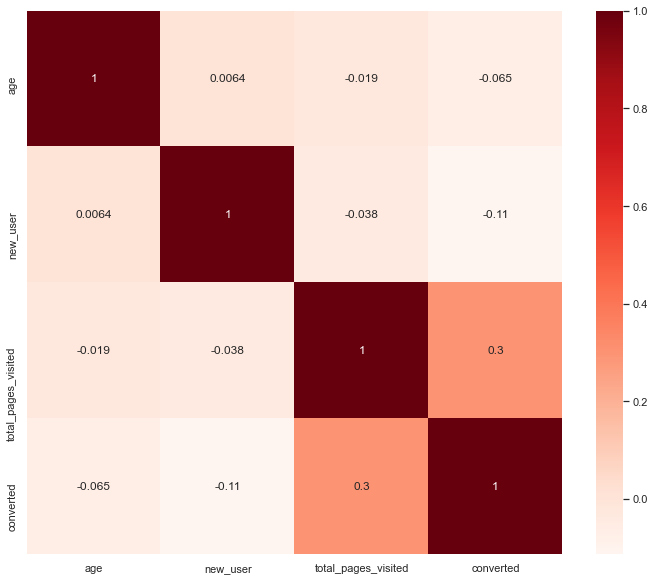

In [103]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

Text(0.5, 1.0, '# people of each age')

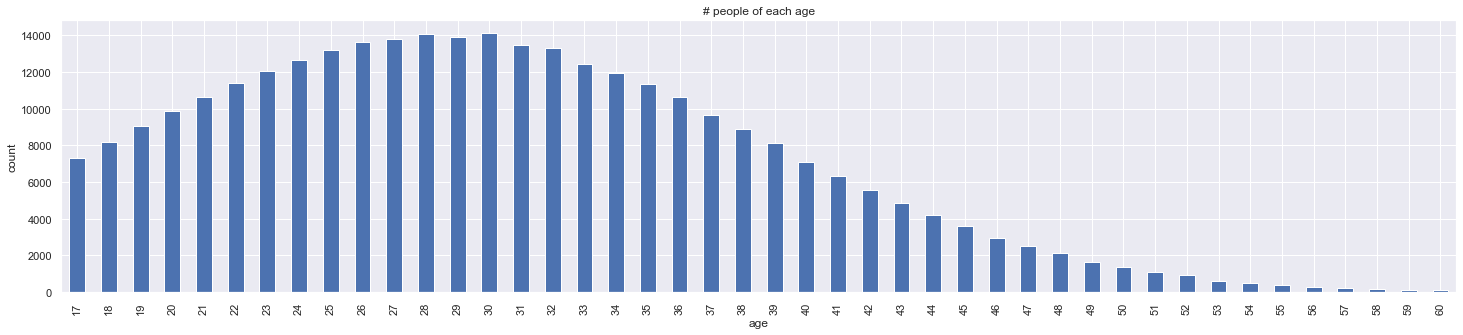

In [104]:
df.groupby('age').size().plot(kind='bar')
plt.xlabel('age')
plt.ylabel('count')
plt.title('# people of each age')

<AxesSubplot:xlabel='country', ylabel='count'>

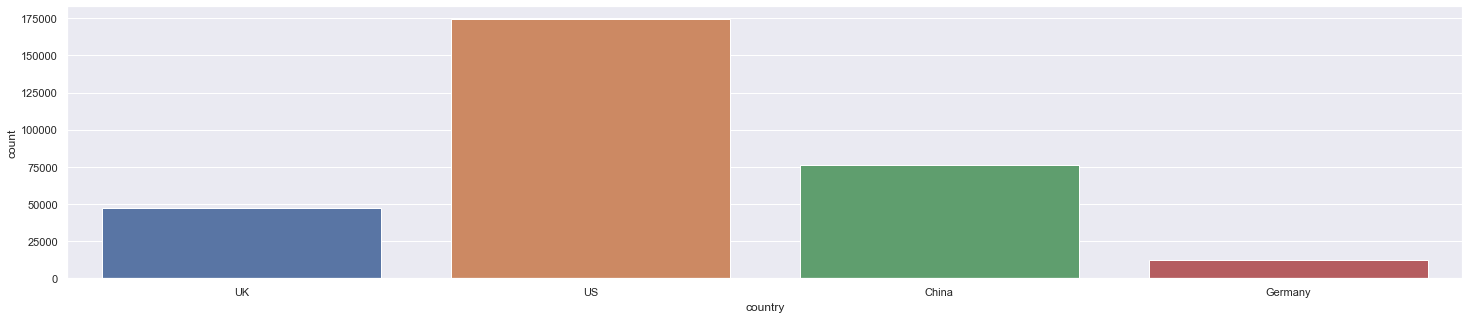

In [105]:
sns.countplot(x = 'country',data = df)

<AxesSubplot:xlabel='source', ylabel='count'>

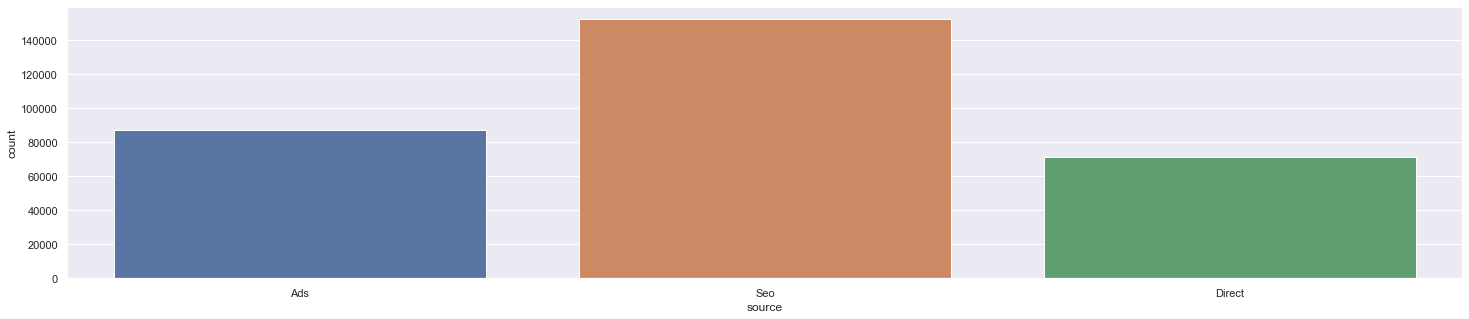

In [106]:
sns.countplot(x = 'source',data = df)

<AxesSubplot:xlabel='total_pages_visited', ylabel='count'>

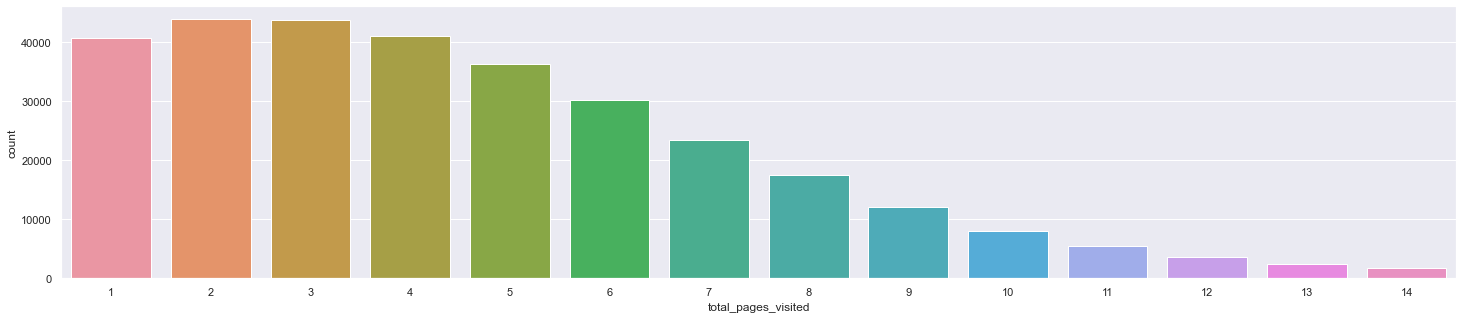

In [107]:
sns.countplot(x = 'total_pages_visited',data = df)

# Check for Multicolinearity

In [20]:
X = df.copy()
X = X.drop('converted', axis=1)

labelencoder = preprocessing.LabelEncoder()
X['country'] = labelencoder.fit_transform(X['country'])
X['source'] = labelencoder.fit_transform(X['source'])

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

               feature       VIF
0              country  3.223721
1                  age  6.397462
2             new_user  2.928380
3               source  2.772324
4  total_pages_visited  3.177548


# Train Test Split

In [ ]:
#Since the country and source are string type feature, we need to label encode them
labelencoder = preprocessing.LabelEncoder()
df['country'] = labelencoder.fit_transform(df['country'])
df['source'] = labelencoder.fit_transform(df['source'])

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
def AUC_ROC(model, X_test, y_test):
    yhat = model.predict_proba(X_test)
    yhat = yhat[:,1]
    fpr,tpr,threshold = roc_curve(y_test,yhat)
    plt.plot([0,1],[0,1],linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='Logistic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    print('The ROC AUC score is: ', roc_auc_score(y_test,yhat))


# Logistic regression

In [ ]:
#这里的fit要加一个ravel去把这个series变成一个flatten array，不然会有warning
#虽然那样也能跑出来
LR = LogisticRegression()
LR.fit(X_train,y_train.values.ravel())
LR_result = LR.score(X_test,y_test)
CV_score = cross_val_score(LR,X,y.values.ravel(),cv=5)
CV_score.mean()

print('The logistic regression result is: ', LR_result)
print('The CV score is:', CV_score)
print( 'The mean CV score is: ', CV_score.mean())
AUC_ROC(LR, X_test, y_test)
print('Confusion Matrix: ','\n',confusion_matrix(y_test,LR.predict(X_test)))

In [ ]:
type(y_test.values.ravel())

# Naive Bayes classifier

In [ ]:
#Naive Bayes Classifier
NB = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state= 0)
NB.fit(X_train, y_train)
NB_CV = cross_val_score(NB, X,y.values.ravel(),cv=5)
NB_yPred = NB.predict(X_test)
NB_accuracy = accuracy_score(y_test, NB_yPred)
print('Cross Validation Score: ',NB_CV.mean())
print('Accuracy: ', NB_accuracy)
AUC_ROC(NB, X_test, y_test)
print('Confusion Matrix: ','\n',confusion_matrix(y_test,NB.predict(X_test)))

# Baseline Decision tree 

In [ ]:
#Decision Tree 
#We first need a baseline decision tree model to confirm the EDA finding 
based_decisionTree = DecisionTreeClassifier()
X_train, X_test, y_train, t_test = train_test_split(X,y, test_size=0.3, random_state=0)
based_decisionTree.fit(X_train,y_train)
print('Accuracy Score: ',based_decisionTree.score(X_test,y_test))
print('Classification report: ',classification_report(y_test,based_decisionTree.predict(X_test)))
print('Confusion matrix: ', '\n',confusion_matrix(y_test,based_decisionTree.predict(X_test)))
AUC_ROC(based_decisionTree, X_test, y_test)

#It means that 92% of the chance they will convert to 0 and 3% of the chance will be converted to 1

# Tunning  Decision Tree Using GridSearchCV

In [ ]:
#We know that the decision tree has a tendency to overfit the model, and 94.4% 
#might seem too accurate. 
#In this step we use GridSearchCV to find the best parameter
#With the area under curve score
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth' :[1,2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,None],
    'min_samples_split':[2,3,4,5,None],
    'min_samples_leaf': [1,2,3,4, None]
}

clf = DecisionTreeClassifier()
clf_grid_cv = GridSearchCV(clf, param_grid, scoring = "roc_auc", n_jobs=-1, cv = 3).fit(X_train,y_train)
    
print("Param for GS", clf_grid_cv.best_params_)
print("CV score for GS", clf_grid_cv.best_score_) 
print("Train AUC ROC Score for GS: ", roc_auc_score(y_train, clf_grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ", roc_auc_score(y_test, clf_grid_cv.predict(X_test)))
print('Confusion matrix: ', '\n',confusion_matrix(y_test,clf_grid_cv.predict(X_test)))
AUC_ROC(clf_grid_cv,X_test, y_test)

#### This is the same GridSearchCV as before besides we used depth as for loop, so we could observe the relationship between depth and AUC_ROC score explicitly

In [ ]:
#Tunning using GridSearchCV
param_grid = {
    'min_samples_split':[2,3,4,5,None],
    'min_samples_leaf': [1,2,3,4,None]
}

train_auc = []
test_auc = []
count = 0

for depth in [1,2,3,4,5,6,7,8,9,10,11,12,15,20,30]:
    clf = DecisionTreeClassifier(max_depth = depth)
    depth_loop_grid_cv = GridSearchCV(clf, param_grid, scoring = "roc_auc", n_jobs=-1, cv = 5).fit(X_train,y_train)
    
    y_train_pred =  depth_loop_grid_cv.predict(X_train)
    y_test_pred =  depth_loop_grid_cv.predict(X_test)
    
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    test_auc.append(roc_auc_score(y_test,y_test_pred))
    
print("Param for GS",  depth_loop_grid_cv.best_params_)
print("CV score for GS",  depth_loop_grid_cv.best_score_) 
print("Train AUC ROC Score for GS: ", roc_auc_score(y_train,  depth_loop_grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ", roc_auc_score(y_test,  depth_loop_grid_cv.predict(X_test)))
print('Confusion matrix: ', '\n',confusion_matrix(y_test,depth_loop_grid_cv.predict(X_test)))


plt.subplot(2,1,1)
plt.tight_layout()
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,15,20,30], train_auc, label = 'Train AUC')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,15,20,30], test_auc, label = 'Test AUC')
plt.ylim(0.7,0.9)
plt.xlabel('depth')
plt.ylabel('AUC ROC')
 

plt.subplot(2,1,2)
AUC_ROC(depth_loop_grid_cv, X_test, y_test)


plt.legend()  

# Tuning decision tree using 3 for loop

In [ ]:
#Tuning decision tree without Grid Search CV
#We only interested in the relationship between depth and AUC, and biggest AUC has better predict
#Thus, no matter what the min_sample_split and min_sample_leaf, we choose the max AUC 
#Found best accuracy of each depth
#Found the best combination according to the best test accuracy
#Visulaize tree
#ROC AUC plot
train_auc = []
test_auc = []
test_accuracy = []
train_accuracy = []
param_comb = []
depth = [1,2,3,4,5,6,7,8,9,10,11,12,15,20,30]
min_sample_split = [2,3,4,5]
min_sample_leaf = [1,2,3,4]

for i in depth:
    train_temp = []
    test_temp = []
    train_accuracy_temp = []
    test_accuracy_temp = []
    param_comb_temp = []
    for j in min_sample_split:
        for k in min_sample_leaf:
            clf = DecisionTreeClassifier(criterion='gini', max_depth= i,min_samples_split= j , min_samples_leaf=k, class_weight = 'balanced' )
            clf.fit(X_train,y_train)

            y_train_pred = clf.predict(X_train)
            y_test_pred = clf.predict(X_test)
            
            test_temp.append(roc_auc_score(y_test,y_test_pred))
            train_temp.append(roc_auc_score(y_train, y_train_pred))
             
            test_accuracy_temp.append(accuracy_score(y_test, y_test_pred))
            train_accuracy_temp.append(accuracy_score(y_train, y_train_pred))
            
            param_comb_temp.append([i,j,k])
            
            
    test_temp_max_id = test_temp.index(max(test_temp))
    test_auc.append(max(test_temp))
    train_auc.append(train_temp[test_temp_max_id])
    test_accuracy.append(test_accuracy_temp[test_temp_max_id])
    train_accuracy.append(train_accuracy_temp[test_temp_max_id])
    param_comb.append(param_comb_temp[test_temp_max_id])
    

    
plt.subplot(3,1,1)
plt.tight_layout()
plt.plot(train_auc, label = 'Train AUC')
plt.plot(test_auc, label = 'Test AUC')


plt.subplot(3,1,2)
plt.plot(train_accuracy,label = 'train_accuracy')
plt.plot(test_accuracy, label = 'test_accuracy')
plt.xlabel('depth')
plt.ylabel('AUC ROC')
plt.legend()


plt.subplot(3,1,3)
AUC_ROC(clf, X_test, y_test)


cm = confusion_matrix(y_test,y_test_pred)
TPR = cm[0][0]/(cm[0][0]+cm[0][1])
FPR = cm[1][0]/(cm[0][0]+cm[1][0])

print('TPR is: ', TPR, '\n', 'FPR is: ', FPR)
print("Train AUC ROC Score trainning set: ", roc_auc_score(y_train, clf.predict(X_train)))
print("Test AUC ROC Score for testing set: ", roc_auc_score(y_test, clf.predict(X_test)))
print('The best test_accuracy score is: ',max(test_accuracy))
print('The best train_accuracy score is: ',max(train_accuracy))
best_test_accuracy_index = test_accuracy.index(max(test_accuracy))
print('The best parameter combination is:', param_comb[best_test_accuracy_index])
print('Confusion Matrix: ', '\n', confusion_matrix(y_test, clf.predict(X_test)))


In [ ]:
#Tree plot
plt.figure(figsize=(10,12))
X_feature = ['country','age','new_user','source','total_pages_visited']
y_feature = ['converted']
_ = plot_tree(clf,filled = True, fontsize=10)

# Baseline Random Forest Classifier

In [ ]:
based_rfc = RandomForestClassifier()
based_rfc.fit(X_train,y_train.values.ravel())
AUC_ROC(based_rfc, X_test, y_test)
print('Accuracy Score: ',based_rfc.score(X_test,y_test))
print('Classification report: ',classification_report(y_test,based_rfc.predict(X_test)))
print('Confusion matrix: ', '\n',confusion_matrix(y_test,based_rfc.predict(X_test)))

# Random forest classifier with grid search cv

In [ ]:
param_grid = {
    #'bootstrap': 'True',
    'criterion': ['gini','entropy'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,15,20,30],
    'max_features': ['auto','sqrt','log2'],
    #'min_sample_split' : [2,3,4,5,None],
    #'min_sample_leaf' : [1,2,3,4],
    'n_estimators': [50,100,200]
}
rfc = RandomForestClassifier()
rfc_grid_cv = GridSearchCV(rfc, param_grid = param_grid, cv = 5)
rfc_grid_cv.fit(X_train,y_train.values.ravel())
print('The best combination of parameters is: ',rfc_grid_cv.best_params_)
print('Accuracy Score: ',rfc_grid_cv.score(X_test,y_test))
print('Classification report: ','\n',classification_report(y_test,rfc_grid_cv.predict(X_test)))
print('Confusion matrix: ', '\n',confusion_matrix(y_test,rfc_grid_cv.predict(X_test)))
AUC_ROC(rfc_grid_cv, X_test, y_test)


In [ ]:
#Feature importance plot
feat_importances = pd.Series(rfc_grid_cv.feature_importances_, index=X_train.drop('converted', axis=1).columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()


# General function for imbalanced target

In [ ]:
#这一步的目的是为了把测试当converted和non-converted的人数一样或者不一样的时候我们的model跑出来会有什么
#不同的结果
#This step blanaced and inbalanced the number of converted and non-converted and run the model
def imbalanced_target(model, dataframe,parameter,xtest,ytest):
    df_1 = dataframe[dataframe['converted'] == 1]
    multiplier = (len(dataframe)-len(df_1))/len(df_1)
    cur_1_len = len(df_1)
    ls = []
    cm_ls = []
    precision_ls = []
    recall_ls = []
    for i in [1,3,5,10,18,multiplier]:
        df_0 = dataframe[dataframe['converted'] == 0].iloc[:int(cur_1_len*i)]
        df_new = df_1.append(df_0)
        X_new = df_new.iloc[:,:-1]
        y_new = df_new.iloc[:,-1:]
        X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y_new,test_size=0.3,random_state=0)

        rfc = RandomForestClassifier()
        grid_cv = GridSearchCV(model, param_grid = parameter, cv = 5)
        grid_cv.fit(X_train_new,y_train_new.values.ravel())
        

        ls.append(roc_auc_score(y_test,grid_cv.predict(X_test)))
        cur_cm = confusion_matrix(y_test, grid_cv.predict(X_test))
        cm_ls.append(cur_cm)
        precision = cur_cm[0][0]/(cur_cm[0][0]+cur_cm[1][0])
        precision_ls.append(precision)
        recall = cur_cm[0][0]/(cur_cm[0][0]+cur_cm[0][1])
        recall_ls.append(recall)

    print('The best combination of parameter is: ', grid_cv.best_params_)
    print('Accuracy Score: ',grid_cv.score(X_test,y_test))
    print('Classification report: ',classification_report(y_test,grid_cv.predict(X_test)))
    print('Confusion matrix: ', '\n',confusion_matrix(y_test,grid_cv.predict(X_test)))
    
    plt.subplot(2,1,1)
    plt.tight_layout()
    AUC_ROC(grid_cv,xtest,ytest)

    plt.subplot(2,1,2)
    plt.plot(recall_ls, precision_ls)
    plt.ylabel('precesion')
    plt.xlabel('recall')

## Imbalanced target for Random Forest Classifier

In [ ]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [1,2,3,4,5],
    'max_features': ['auto','sqrt','log2'],
}
rfc = RandomForestClassifier()
imbalanced_target(rfc,df,param_grid,X_test,y_test)

## Imbalanced target for Decision Tree Classifier

In [ ]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,15,20,30],
    'max_features': ['auto','sqrt','log2'],
}
clf = DecisionTreeClassifier()
imbalanced_target(clf,df,param_grid,X_test,y_test)

## Imbalanced target for Naive Bayes

In [ ]:
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
NB = GaussianNB()
imbalanced_target(NB,df,param_grid,X_test,y_test)

## Imbalanced target for Logistic Regression

In [ ]:
param_grid = {
    'penalty' : ['l2'],
    #'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
}
LR = LogisticRegression(max_iter=999999999)
imbalanced_target(LR,df,param_grid,X_test,y_test)

# Conclusion and Suggestion

In [ ]:
#ROC AUC score comparsion
print('The ROC AUC for LR is: ',  0.9843053400069826)
print('The ROC AUC for NB is: ',  0.9833552014109874)
print('The ROC AUC score for decision tree is: ',  0.9204077566169123)
print('The ROC AUC score for decision tree with gridsearchCV is: ',  0.9820228305704966)
print('The ROC AUC score for decision tree with loop depth is: ',  0.9405027316362164)
print('The ROC AUC score for decision tree with three loop is: ',  0.9177369457024045)
print('The ROC AUC score for based random forest is: ',  0.9498663220261127)
print('The ROC AUC score for gridsearchCV random forest is: ',  0.9846462038378936, '\n')

#ROC AUC for imbalanced target
print('The imbalanced target ROC AUC score for random forest is: ',  0.9812108794466343)
print('The imbalanced target ROC AUC score for Decision tree is: ',  0.9651270746863012)
print('The imbalanced target ROC AUC score for NB is: ',  0.9834598355471221)
print('The imbalanced target ROC AUC score for LR is: ',  0.9851886991355682)

In [ ]:
#All the models work fine beside the logistic regression with imbalanced target. As I set the max_iter to the
#largest number, the model couldn't converge. This is caused either by the data, or the model just isn't the right choice
#So we may not consider it as our model, althought its ROC_AUC score is the highest

In [ ]:
ROC_AUC_ls = {'LR: ': 0.9843053400069826,
             'NB: ':  0.9833552014109874,
             'decision tree: ': 0.9204077566169123,
             'gridsearchCV decision tree: ': 0.9820228305704966,
             'depth loop decision tree: ':0.9405027316362164,
             'three-loop decision tree:':0.9177369457024045,
             'random forest: ':0.9498663220261127,
             'gridsearchCV random forest: ' : 0.9846462038378936, 
             'imbalanced random forest: ': 0.9812108794466343,
             'imbalanced decision tree:' : 0.9651270746863012,
             'imbalanced NB: ':0.9834598355471221 ,
             #'imbalanced LR: ': 0.9851886991355682
             }

max_val = 0
max_key = ''
for key, value in ROC_AUC_ls.items():
    if value > max_val:
        max_val = value
        max_key = key

print('The best model based on ROC_AUC score is: ', max_key, ' with score: ', max_val)